In [50]:
# Import Libraries
# 01.To handle the data
import pandas as pd
import numpy as np
# 02.To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 03. To preprocess the data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler



# 04. import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 05. Machine Learning Models
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
# 07. For Regression task
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier

from xgboost import XGBRegressor
# 07. Metrics for regression task
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
# Define Accuracy score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 150




## 1. Data Loading and Initial Exploration

Load the heart disease dataset and examine its structure, dimensions, and basic statistics.

In [52]:

df = pd.read_csv("heart_disease_uci (1).csv")

# print the first 5 rows
df.head(5)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [53]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [54]:
# Summary statistics of the dataframe
df.describe(include="all").T

count unique           top freq        mean         std   min  \
id        920.0    NaN           NaN  NaN       460.5  265.725422   1.0   
age       920.0    NaN           NaN  NaN    53.51087    9.424685  28.0   
sex         920      2          Male  726         NaN         NaN   NaN   
dataset     920      4     Cleveland  304         NaN         NaN   NaN   
cp          920      4  asymptomatic  496         NaN         NaN   NaN   
trestbps  861.0    NaN           NaN  NaN  132.132404    19.06607   0.0   
chol      890.0    NaN           NaN  NaN  199.130337   110.78081   0.0   
fbs         830      2         False  692         NaN         NaN   NaN   
restecg     918      3        normal  551         NaN         NaN   NaN   
thalch    865.0    NaN           NaN  NaN  137.545665   25.926276  60.0   
exang       865      2         False  528         NaN         NaN   NaN   
oldpeak   858.0    NaN           NaN  NaN    0.878788    1.091226  -2.6   
slope       611      3          flat  345         NaN         NaN   NaN   
ca        309.0    NaN           NaN  NaN    0.676375    0.935653   0.0   
thal        434      3        normal  196         NaN         NaN   NaN   
num       920.0    NaN           NaN  NaN    0.995652    1.142693   0.0   

             25%    50%     75%    max  
id        230.75  460.5  690.25  920.0  
age         47.0   54.0    60.0   77.0  
sex          NaN    NaN     NaN    NaN  
dataset      NaN    NaN     NaN    NaN  
cp           NaN    NaN     NaN    NaN  
trestbps   120.0  130.0   140.0  200.0  
chol       175.0  223.0   268.0  603.0  
fbs          NaN    NaN     NaN    NaN  
restecg      NaN    NaN     NaN    NaN  
thalch     120.0  140.0   157.0  202.0  
exang        NaN    NaN     NaN    NaN  
oldpeak      0.0    0.5     1.5    6.2  
slope        NaN    NaN     NaN    NaN  
ca           0.0    0.0     1.0    3.0  
thal         NaN    NaN     NaN    NaN  
num          0.0    1.0     2.0    4.0

## Exploratory Data Visualization
The following plots provide a quick visual understanding of the dataset before modeling.


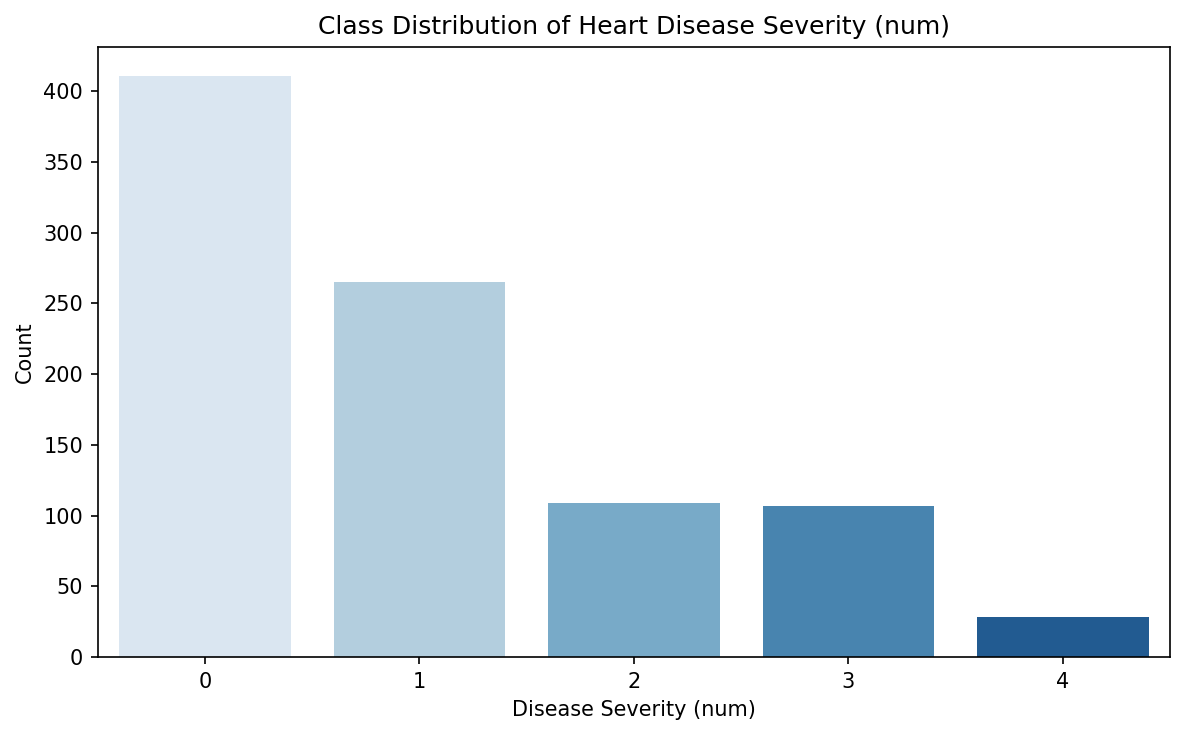

In [56]:
# Bar plot: class distribution of heart disease severity (num)
plt.figure(figsize=(8, 5))
order = sorted(df['num'].dropna().unique())
sns.countplot(data=df, x='num', order=order, palette='Blues')
plt.title('Class Distribution of Heart Disease Severity (num)')
plt.xlabel('Disease Severity (num)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The class distribution is imbalanced: class 0 is the most frequent while severe class 4 appears rarely. 
This means the model will see far fewer high-severity cases, so stratified splits and metrics beyond 
accuracy are important to avoid bias toward the majority class.


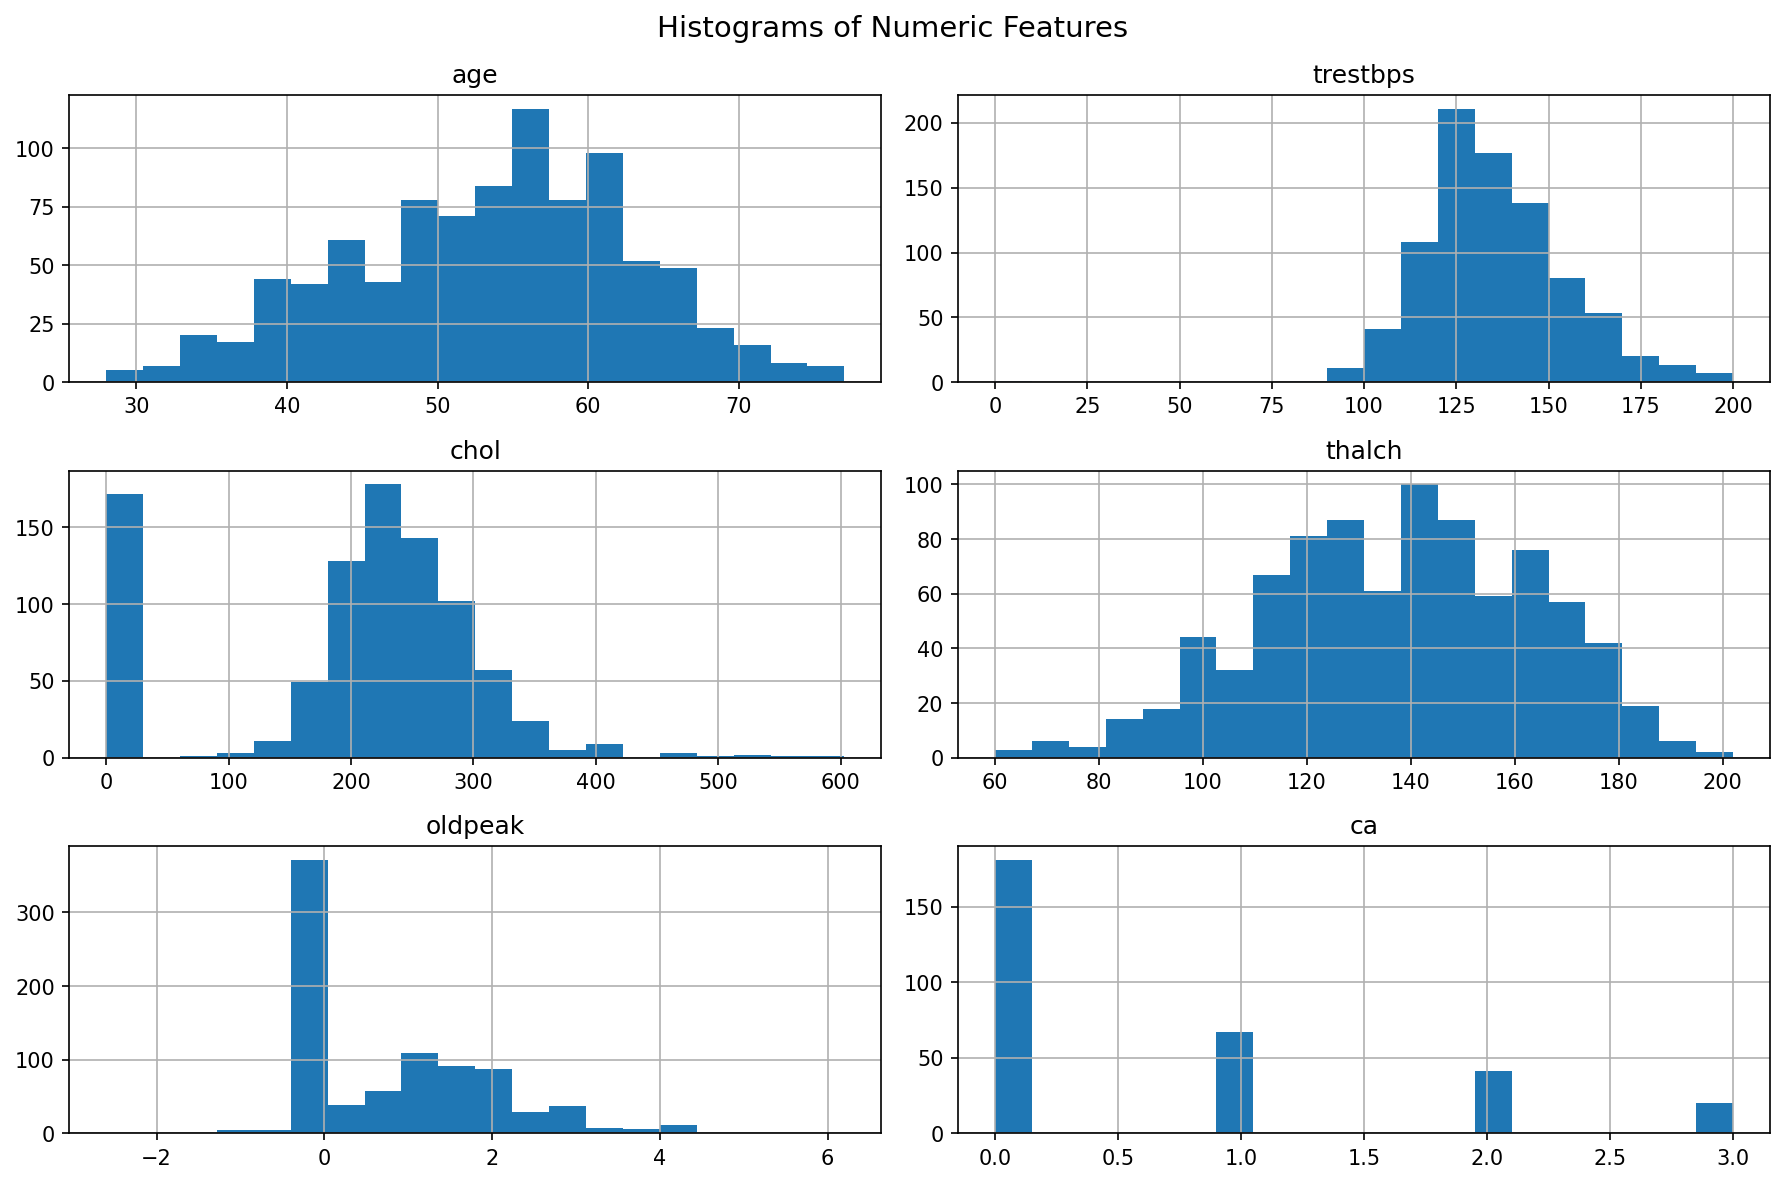

In [58]:
# Histograms for numerical features
numeric_features = df.select_dtypes(include='number').drop(columns=['id', 'num'], errors='ignore')
numeric_features.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()


Several numeric features are skewed (for example, `oldpeak` tends to be right-skewed), 
and the ranges vary widely across variables. This suggests scaling or transformation may 
help certain algorithms and that outliers should be reviewed.


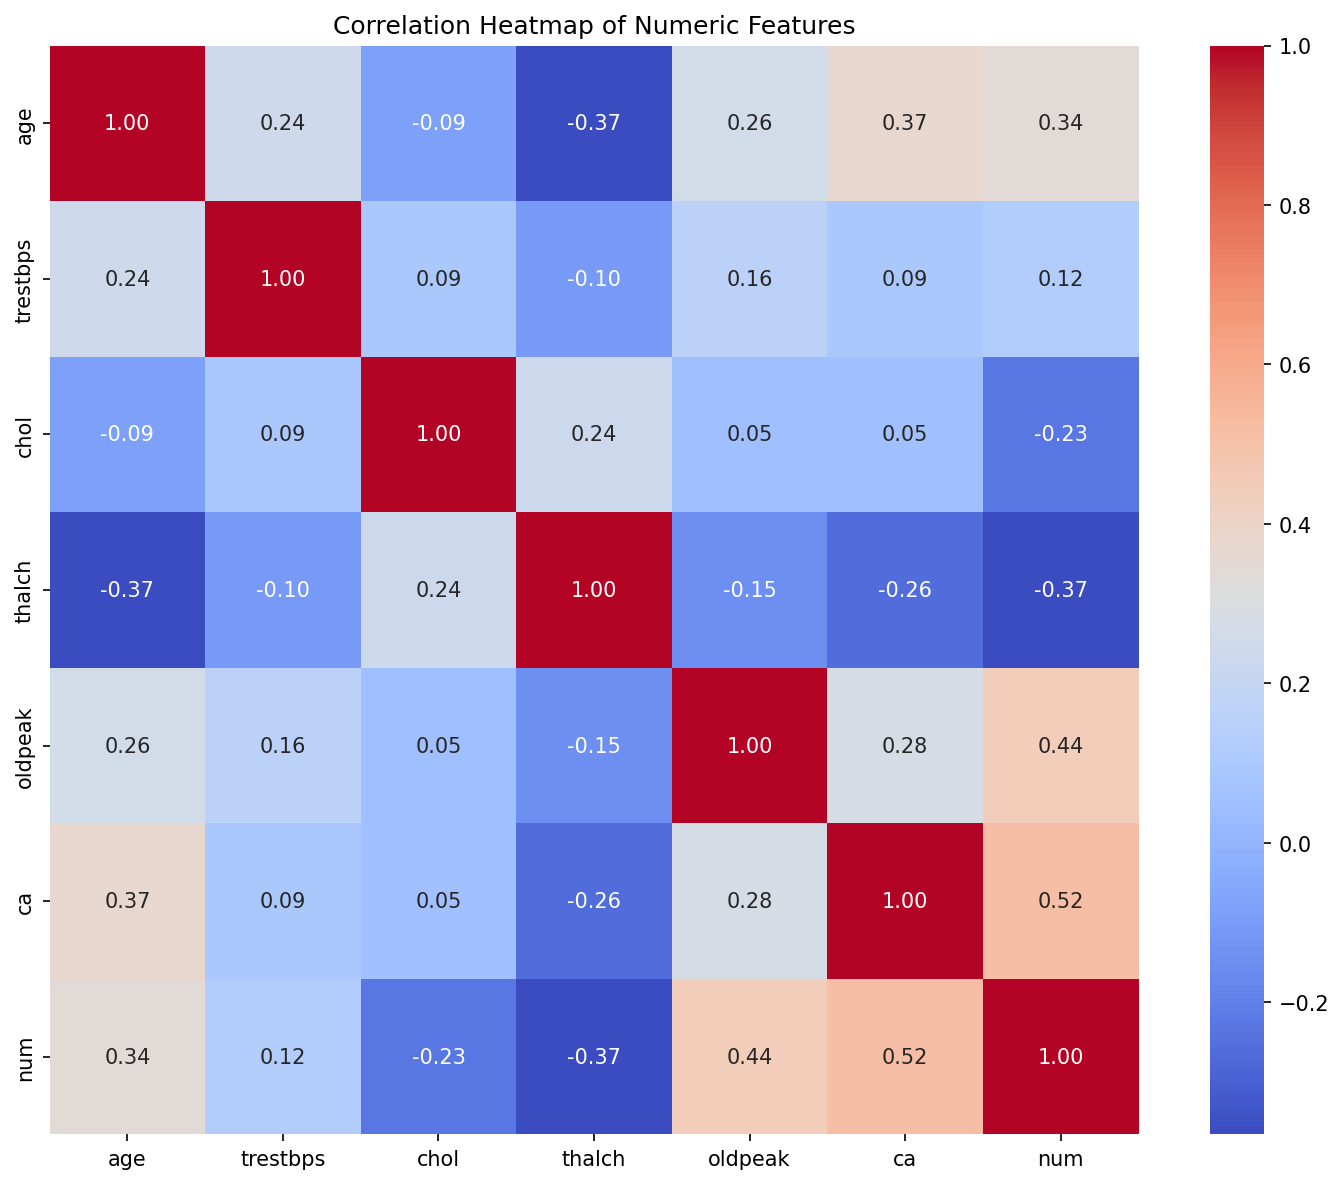

In [60]:
# Correlation heatmap for numeric features (including target)
corr_cols = numeric_features.columns.tolist() + ['num']
corr = df[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


The heatmap shows moderate relationships between the target (`num`) and features like `ca` 
and `oldpeak`, while `thalch` is negatively correlated with `num`. Most feature-feature 
correlations are not extreme, suggesting limited multicollinearity among numeric predictors.


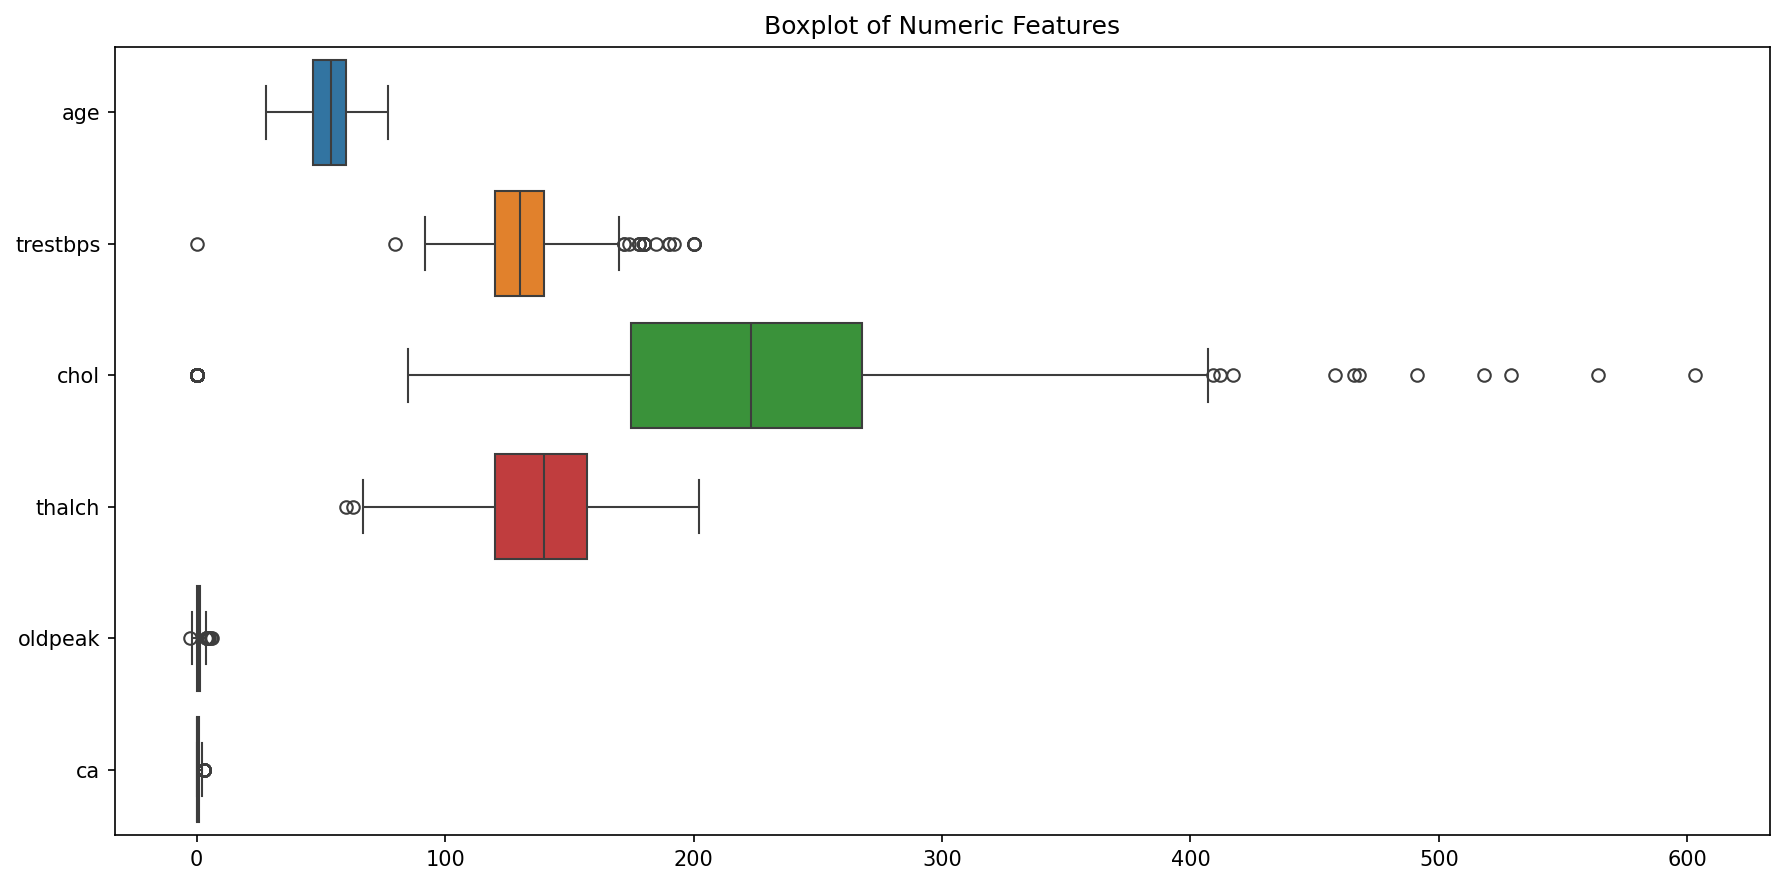

In [62]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features.columns], orient='h')
plt.title('Boxplot of Numeric Features')
plt.tight_layout()
plt.show()


Boxplots highlight outliers in variables such as `chol`, `trestbps`, and `oldpeak`. 
These extreme values can influence distance-based models (e.g., KNN) or linear models, 
so robust scaling or outlier handling may be warranted.


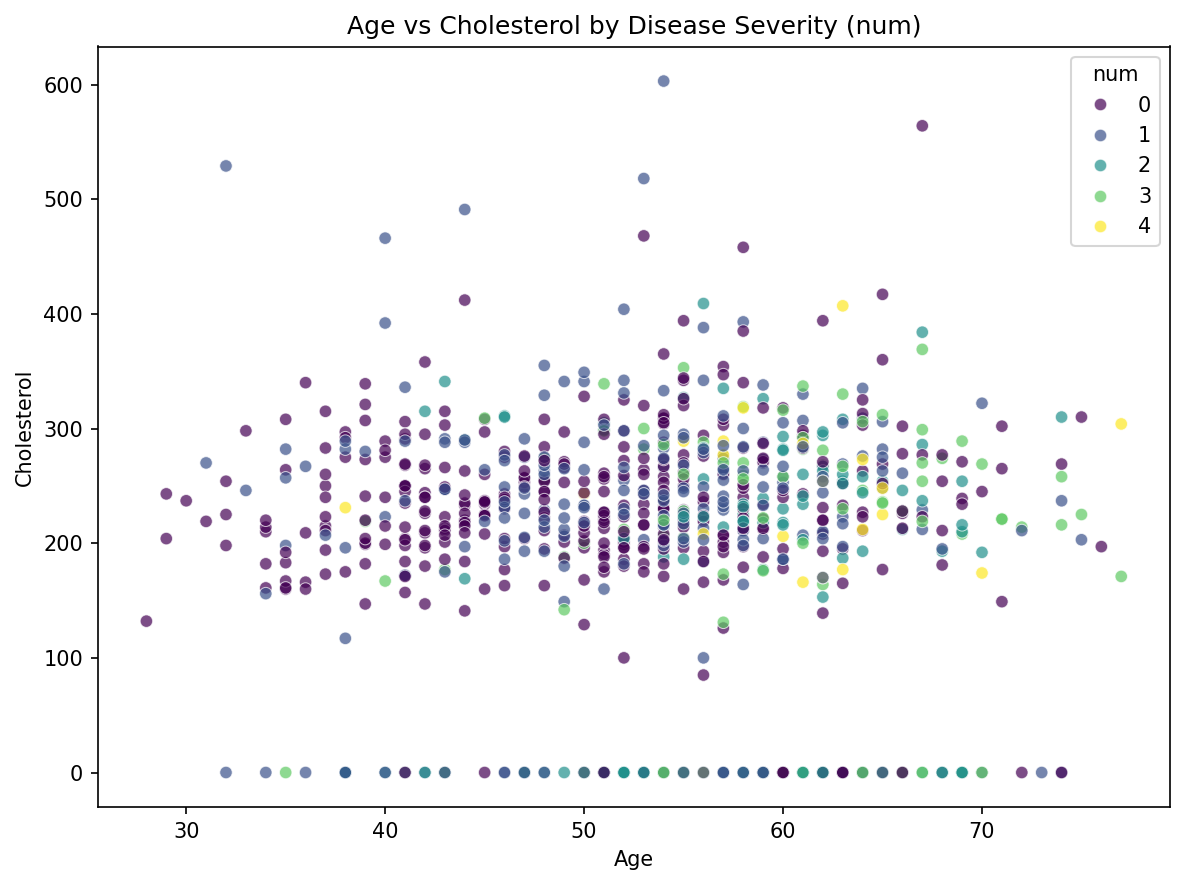

In [64]:
# Scatter plot to inspect relationships (age vs cholesterol)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='num', palette='viridis', alpha=0.7)
plt.title('Age vs Cholesterol by Disease Severity (num)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.tight_layout()
plt.show()


The scatter plot shows substantial overlap between severity classes across both age and cholesterol, 
which suggests that no simple linear boundary separates the classes. This supports trying 
non-linear models (e.g., Random Forest, SVM with non-linear kernels) in addition to linear baselines.


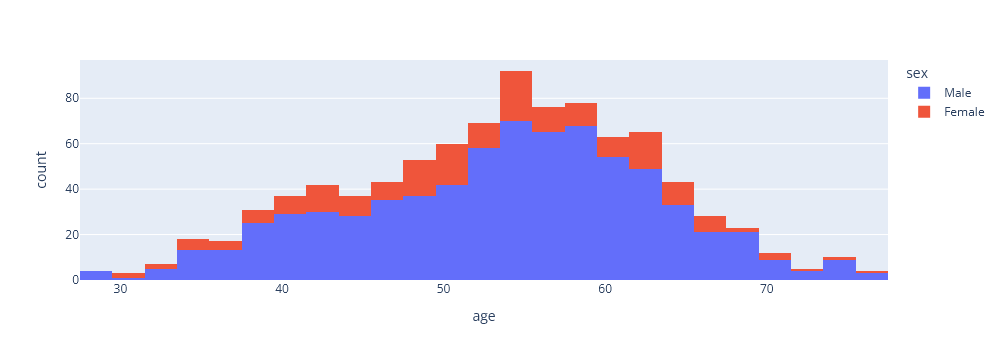

In [66]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [67]:
# Create a list of categorical columns and numerical columns
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset']

num_cols = ['age','trestbps','chol','thalch','oldpeak']



In [68]:
# Checking coulmns for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [69]:
# Identify the columns in which the data is missing.
round((df.isnull().sum()[df.isnull().sum()>0]/len(df)*100),1).sort_values(ascending=False)

ca          66.4
thal        52.8
slope       33.6
fbs          9.8
oldpeak      6.7
trestbps     6.4
thalch       6.0
exang        6.0
chol         3.3
restecg      0.2
dtype: float64

In [70]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [71]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [72]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [73]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor(random_state=42)

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    # Fixed: Use np.sqrt() for RMSE calculation instead of squared parameter
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"The feature '{passed_col}' imputation metrics:")
    print(f"MAE = {mae:.4f}")
    print(f"RMSE = {rmse:.4f}")
    print(f"R2 = {r2:.4f}\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [74]:

categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
bool_cols = ['fbs', 'exang']

In [75]:


for col in missing_data_cols:
    print(f"Processing: {col}")
    print(f"Missing Values: {str(round((df[col].isnull().sum() / len(df)) * 100, 2))}%")
    
    if col in categorical_cols:
        # Use categorical imputation function
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        # Use continuous imputation function
        df[col] = impute_continuous_missing_data(col)
    else:
        print(f"Column {col} not in any category, skipping...\n")


print(df.isnull().sum().sort_values(ascending=False))
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Processing: trestbps
Missing Values: 6.41%
The feature 'trestbps' imputation metrics:
MAE = 13.3668
RMSE = 17.3952
R2 = 0.0552

Processing: chol
Missing Values: 3.26%
The feature 'chol' imputation metrics:
MAE = 45.7275
RMSE = 64.8377
R2 = 0.6670

Processing: fbs
Missing Values: 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Processing: restecg
Missing Values: 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Processing: thalch
Missing Values: 5.98%
The feature 'thalch' imputation metrics:
MAE = 16.6689
RMSE = 21.5894
R2 = 0.3223

Processing: exang
Missing Values: 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Processing: oldpeak
Missing Values: 6.74%
The feature 'oldpeak' imputation metrics:
MAE = 0.5635
RMSE = 0.7964
R2 = 0.3958

Processing: slope
Missing Values: 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Processing: ca
Missing Values: 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Processing: thal
M

The feature 'trestbps' imputation metrics:
MAE = 13.3668
RMSE = 17.3952
R2 = 0.0552

Processing: chol
Missing Values: 3.26%
The feature 'chol' imputation metrics:
MAE = 45.7275
RMSE = 64.8377
R2 = 0.6670

Processing: fbs
Missing Values: 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Processing: restecg
Missing Values: 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Processing: thalch
Missing Values: 5.98%
The feature 'thalch' imputation metrics:
MAE = 16.7146
RMSE = 21.6371
R2 = 0.3193

Processing: exang
Missing Values: 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Processing: oldpeak
Missing Values: 6.74%
The feature 'oldpeak' imputation metrics:
MAE = 0.5635
RMSE = 0.7964
R2 = 0.3958

Processing: slope
Missing Values: 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Processing: ca
Missing Values: 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Processing: thal
Missing Values: 52.83%
The feature 'thal' ha

In [76]:
# Identify the unique values in each categorical column.
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        print(col, ":", df[col].unique(), '\n')

sex : ['Male' 'Female'] 

dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach'] 

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] 

fbs : [True False] 

restecg : ['lv hypertrophy' 'normal' 'st-t abnormality'] 

exang : [False True] 

slope : ['downsloping' 'flat' 'upsloping'] 

thal : ['fixed defect' 'normal' 'reversable defect'] 



In [77]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [78]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
# Encode the categorical columns using label encoding.
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = label_encoder.fit_transform(df[col])


In [79]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

id            0
age           0
trestbps     28
chol        185
thalch        2
oldpeak       3
ca           20
num           0
dtype: int64

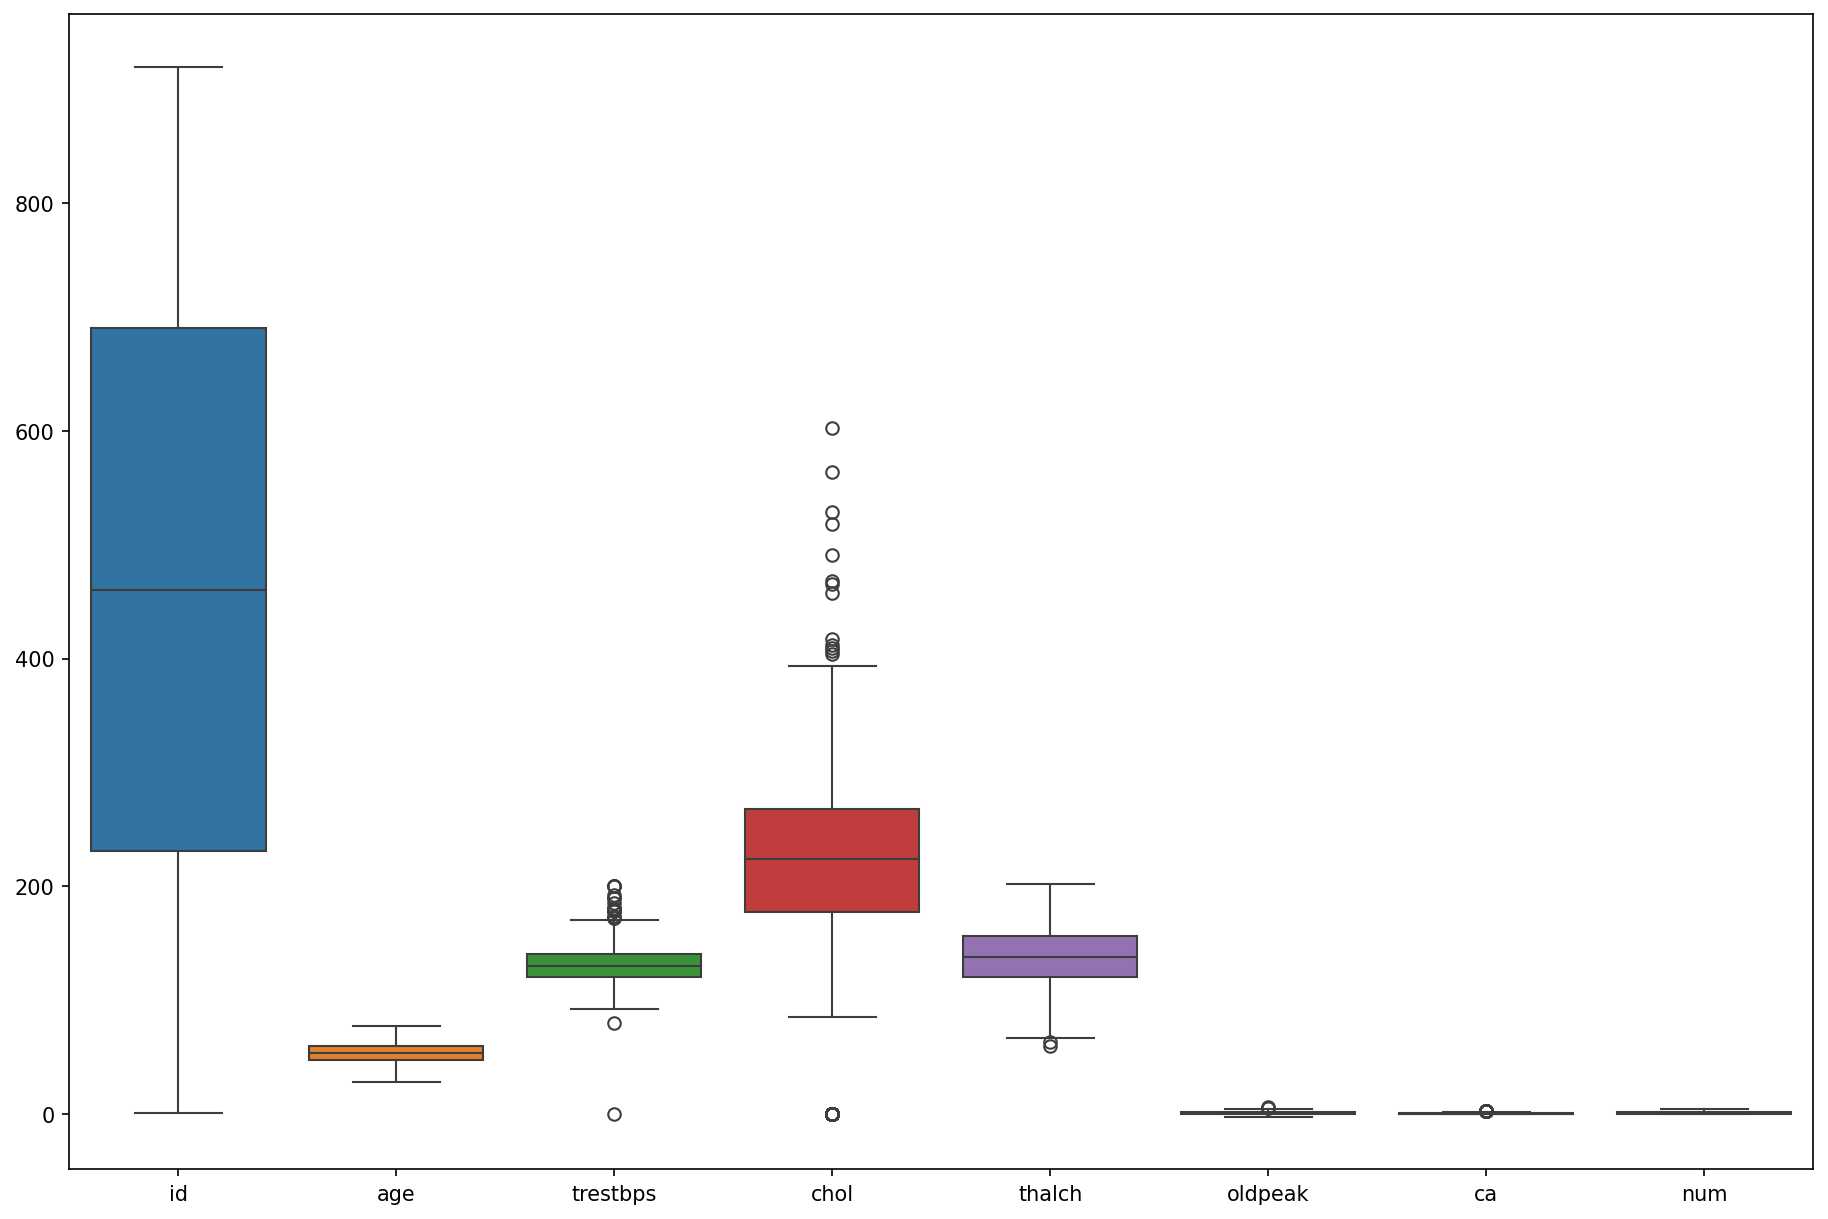

Text(0.5, 0.98, 'Boxplot of Continuous Features')

<Figure size 960x720 with 0 Axes>

In [80]:
# PLot the boxplot to check the outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_cols])
plt.show()
plt.suptitle('Boxplot of Continuous Features', fontsize=22)

In [81]:
# Check the maximum values of numeric columns
print(df[numeric_cols].max())
print('..................................................')
# Check the minimum values of numeric columns
print(df[numeric_cols].min())
# Store numerical features in a variable
continuous_features= df[numeric_cols]
continuous_features.head()


oldpeak       6.2
thalch      202.0
chol        603.0
trestbps    200.0
age          77.0
dtype: float64
..................................................
oldpeak     -2.6
thalch      60.0
chol         0.0
trestbps     0.0
age         28.0
dtype: float64


oldpeak  thalch   chol  trestbps  age
0      2.3   150.0  233.0     145.0   63
1      1.5   108.0  286.0     160.0   67
2      2.6   129.0  229.0     120.0   67
3      3.5   187.0  250.0     130.0   37
4      1.4   172.0  204.0     130.0   41

## 3. Model Training and Evaluation



In [152]:
# SVM Classification (SVC) with grid search evaluation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC

# Binary target: 0 = no disease, 1 = disease
X_cls = df.drop(columns=["num", "id", "dataset"], errors="ignore")
y_cls = (df["num"] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

svm_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", SVC(probability=True, class_weight="balanced", random_state=42)),
])

svm_params = {
    "model__kernel": ["linear", "rbf", "poly"],
    "model__C": [0.1, 1, 10],
}

svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_params,
    cv=5,
)

svm_grid.fit(X_train, y_train)
svm_pred = svm_grid.predict(X_test)
svm_score = svm_grid.predict_proba(X_test)[:, 1]

svm_results = {
    "Model": "Support Vector Machine",
    "Accuracy": accuracy_score(y_test, svm_pred),
    "Precision": precision_score(y_test, svm_pred, zero_division=0),
    "Recall": recall_score(y_test, svm_pred, zero_division=0),
    "F1": f1_score(y_test, svm_pred, zero_division=0),
    "ROC_AUC": roc_auc_score(y_test, svm_score),
}

svm_results


{'Model': 'Support Vector Machine',
 'Accuracy': 0.8804347826086957,
 'Precision': 0.8921568627450981,
 'Recall': 0.8921568627450981,
 'F1': 0.8921568627450981,
 'ROC_AUC': 0.9399808703969392}

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



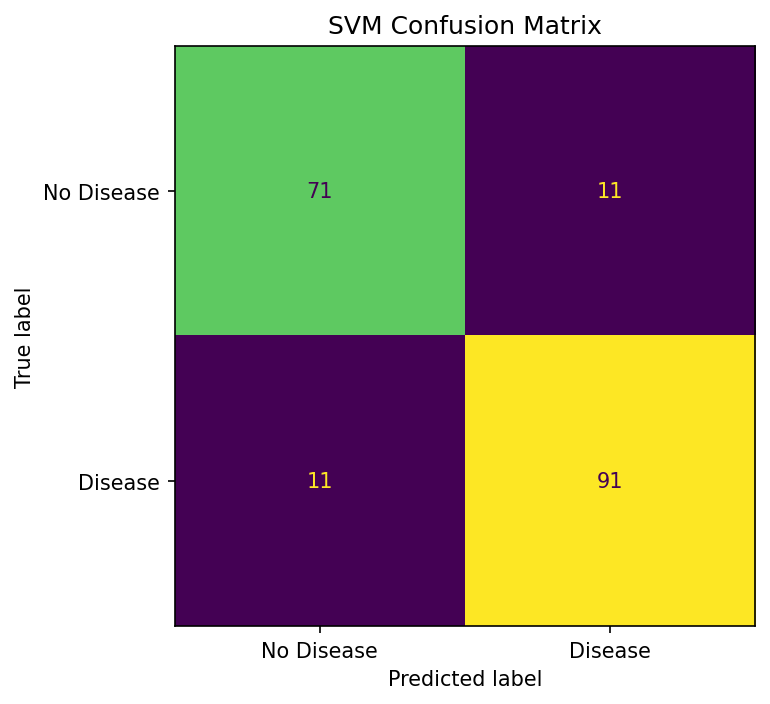

In [85]:
from sklearn.metrics import classification_report, RocCurveDisplay

# Classification report
print(classification_report(y_test, svm_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(colorbar=False)
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()


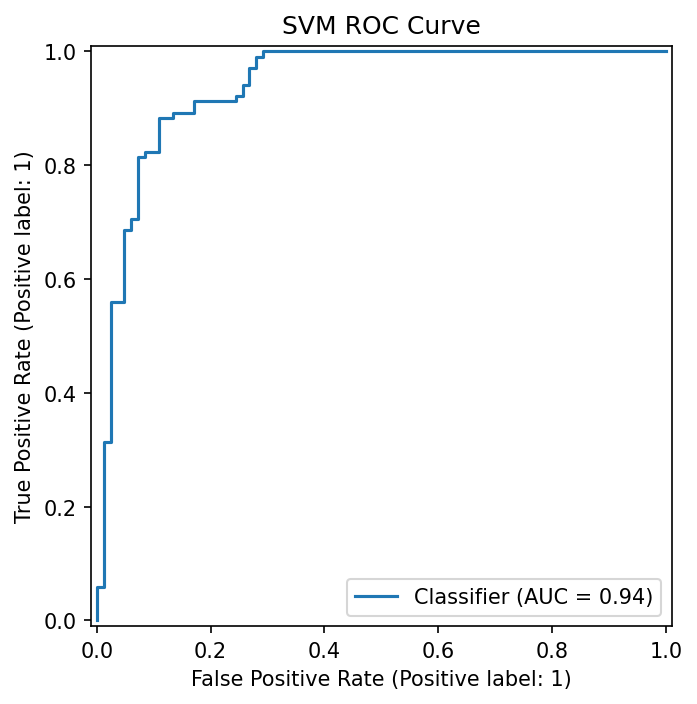

SVM CV Accuracy Mean: 0.8010869565217391
SVM CV Accuracy Std: 0.10725127290038271


In [86]:
# ROC curve
RocCurveDisplay.from_predictions(y_test, svm_score)
plt.title("SVM ROC Curve")
plt.tight_layout()
plt.show()

# Cross-validation accuracy (same pipeline & params as best model)
best_svm = svm_grid.best_estimator_
cv_scores = cross_val_score(best_svm, X_cls, y_cls, cv=5, scoring="accuracy")
print("SVM CV Accuracy Mean:", cv_scores.mean())
print("SVM CV Accuracy Std:", cv_scores.std())


In [88]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_cls = df.drop(columns=["num", "id", "dataset"], errors="ignore")
y_cls = (df["num"] > 0).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

xgb_clf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42
    )),
])

xgb_clf.fit(X_train_cls, y_train_cls)
y_pred = xgb_clf.predict(X_test_cls)

results = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test_cls, y_pred),
    "Precision": precision_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "Recall": recall_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "F1": f1_score(y_test_cls, y_pred, average="binary", zero_division=0),
}
results


{'Model': 'XGBoost',
 'Accuracy': 0.842391304347826,
 'Precision': 0.8613861386138614,
 'Recall': 0.8529411764705882,
 'F1': 0.8571428571428571}

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        82
           1       0.86      0.85      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



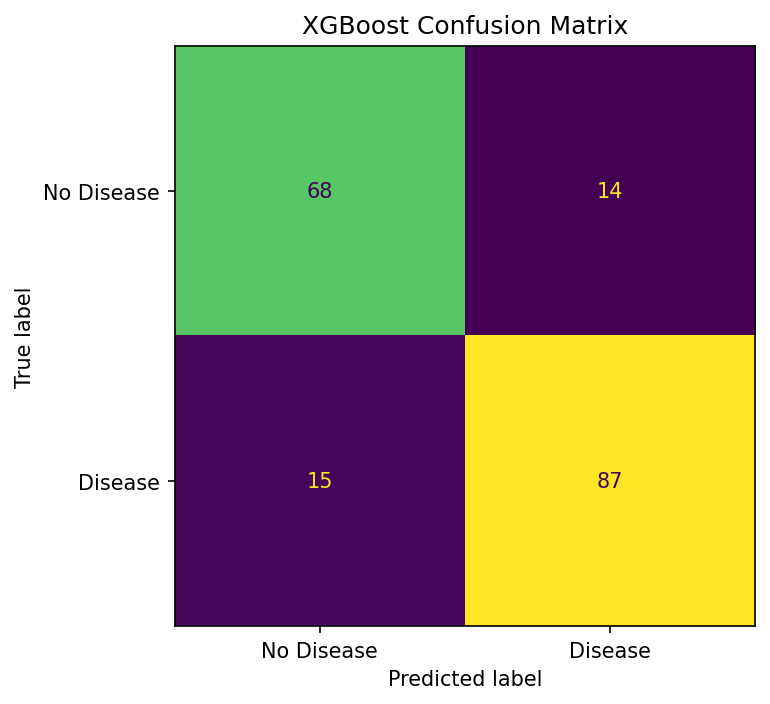

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score

# Probabilities for ROC/AUC
y_score = xgb_clf.predict_proba(X_test_cls)[:, 1]

# Classification report
print(classification_report(y_test_cls, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(colorbar=False)
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()


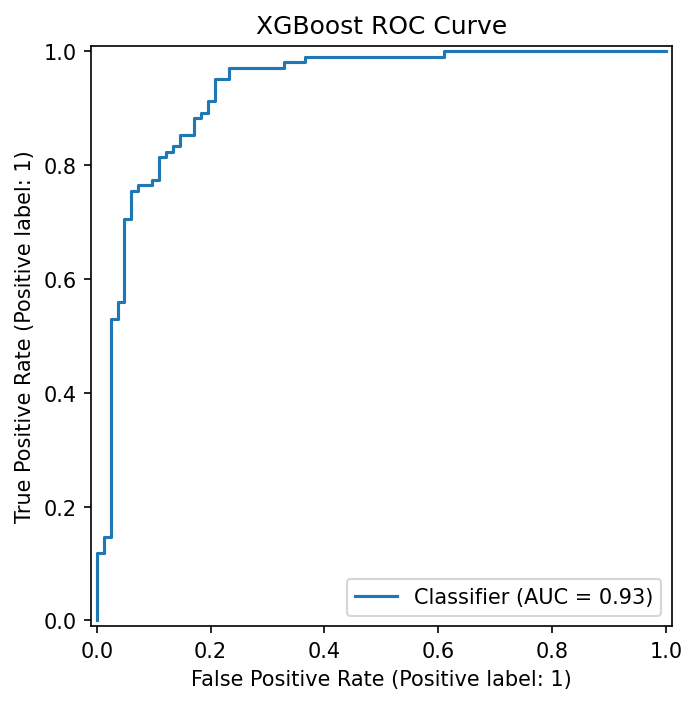

XGBoost CV Accuracy Mean: 0.7684782608695652
XGBoost CV Accuracy Std: 0.08367447501703361


In [90]:
# ROC curve
RocCurveDisplay.from_predictions(y_test_cls, y_score)
plt.title("XGBoost ROC Curve")
plt.tight_layout()
plt.show()

# ROC-AUC (if you want the numeric value)
roc_auc = roc_auc_score(y_test_cls, y_score)
roc_auc

# Cross-validation accuracy
cv_scores = cross_val_score(xgb_clf, X_cls, y_cls, cv=5, scoring="accuracy")
print("XGBoost CV Accuracy Mean:", cv_scores.mean())
print("XGBoost CV Accuracy Std:", cv_scores.std())

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_cls = df.drop(columns=["num", "id", "dataset"], errors="ignore")
y_cls = (df["num"] > 0).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

knn_clf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", KNeighborsClassifier(n_neighbors=5)),
])

knn_clf.fit(X_train_cls, y_train_cls)
y_pred = knn_clf.predict(X_test_cls)

results = {
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test_cls, y_pred),
    "Precision": precision_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "Recall": recall_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "F1": f1_score(y_test_cls, y_pred, average="binary", zero_division=0),
}
results


{'Model': 'KNN',
 'Accuracy': 0.7445652173913043,
 'Precision': 0.7619047619047619,
 'Recall': 0.7843137254901961,
 'F1': 0.7729468599033816}

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cls, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71        82
           1       0.76      0.78      0.77       102

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184



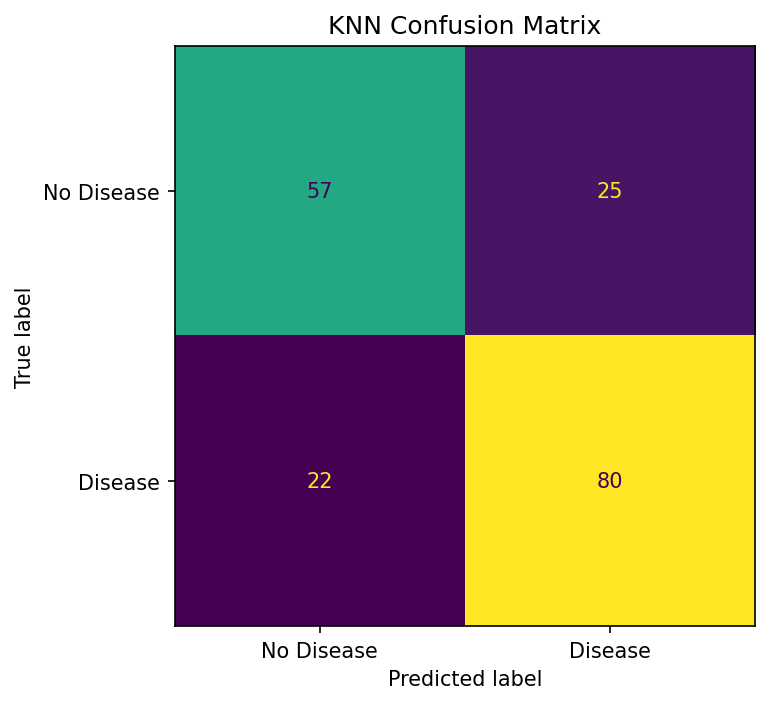

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(colorbar=False)
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()


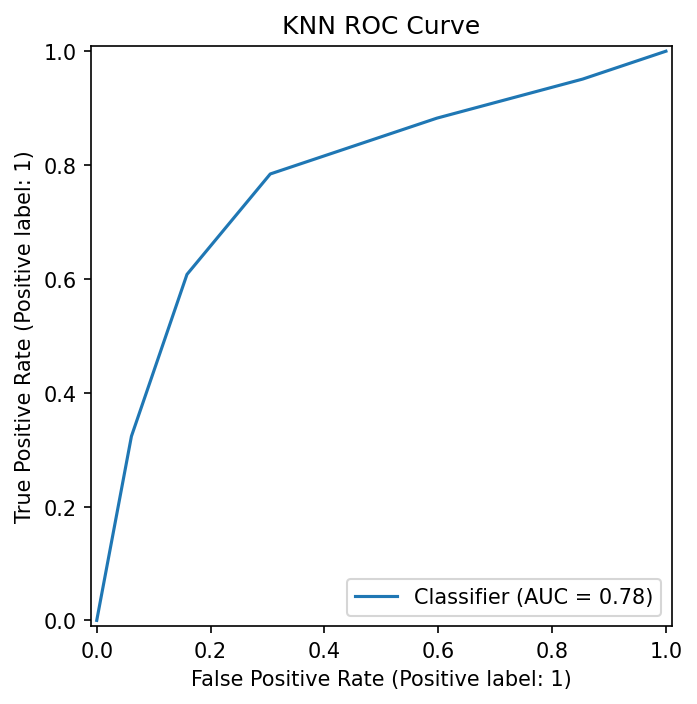

In [94]:
from sklearn.metrics import RocCurveDisplay

y_score = knn_clf.predict_proba(X_test_cls)[:, 1]
RocCurveDisplay.from_predictions(y_test_cls, y_score)
plt.title("KNN ROC Curve")
plt.tight_layout()
plt.show()


In [95]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_cls = df.drop(columns=["num", "id", "dataset"], errors="ignore")
y_cls = (df["num"] > 0).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

rf_clf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    )),
])

rf_clf.fit(X_train_cls, y_train_cls)
y_pred = rf_clf.predict(X_test_cls)

results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test_cls, y_pred),
    "Precision": precision_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "Recall": recall_score(y_test_cls, y_pred, average="binary", zero_division=0),
    "F1": f1_score(y_test_cls, y_pred, average="binary", zero_division=0),
}
results


{'Model': 'Random Forest',
 'Accuracy': 0.8804347826086957,
 'Precision': 0.8703703703703703,
 'Recall': 0.9215686274509803,
 'F1': 0.8952380952380953}

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cls, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



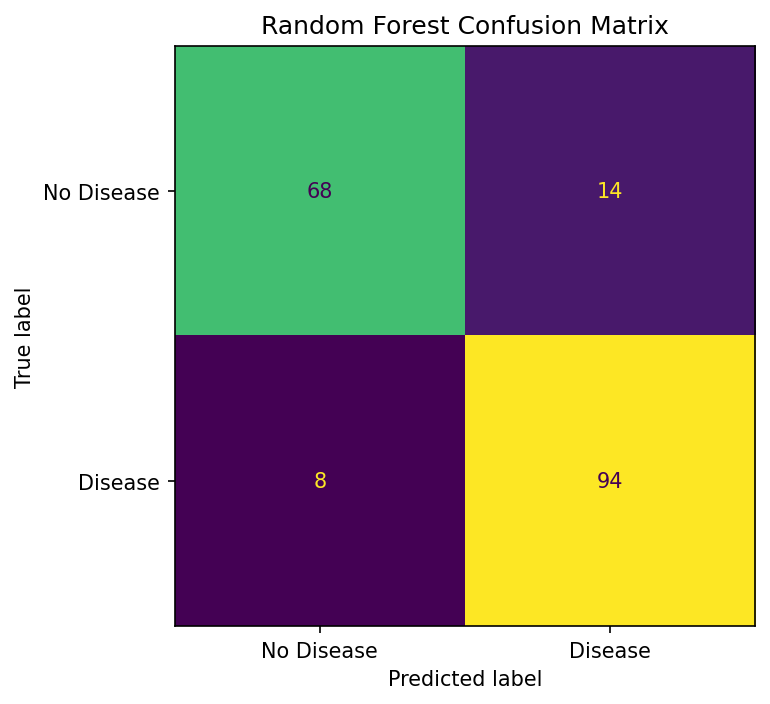

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cls, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(colorbar=False)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


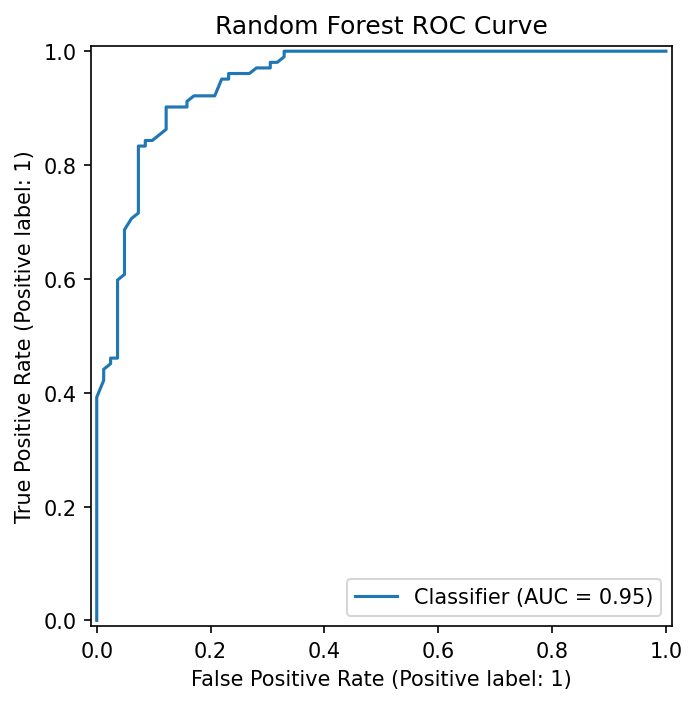

In [98]:
from sklearn.metrics import RocCurveDisplay

y_score = rf_clf.predict_proba(X_test_cls)[:, 1]
RocCurveDisplay.from_predictions(y_test_cls, y_score)
plt.title("Random Forest ROC Curve")
plt.tight_layout()
plt.show()


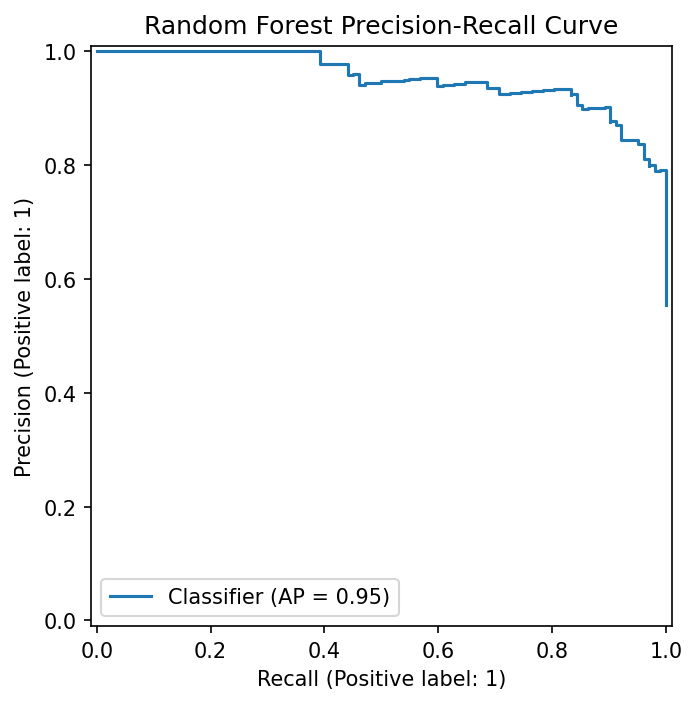

In [99]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test_cls, y_score)
plt.title("Random Forest Precision-Recall Curve")
plt.tight_layout()
plt.show()


In [100]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf, X_cls, y_cls, cv=5, scoring="accuracy")
print("Random Forest CV Accuracy Mean:", cv_scores.mean())
print("Random Forest CV Accuracy Std:", cv_scores.std())


Random Forest CV Accuracy Mean: 0.8010869565217391
Random Forest CV Accuracy Std: 0.10171032665469207


## Model Evaluation and Comparison
This section evaluates classification models using accuracy, precision, recall, F1-score, confusion matrix, ROC-AUC, and cross-validation. 
These metrics provide both overall performance and class-specific error insight.


In [102]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Binary target: 0 = no disease, 1 = disease
y_cls = (df["num"] > 0).astype(int)
X_cls = df.drop(columns=["num", "id", "dataset"], errors="ignore")

# Separate numeric and categorical columns
num_cols = X_cls.select_dtypes(include=["number"]).columns
cat_cols = X_cls.select_dtypes(exclude=["number"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

models_cls = {
    "SVM (RBF)": Pipeline([
        ("preprocess", preprocess),
        ("model", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)),
    ]),
    "Random Forest": Pipeline([
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(
            n_estimators=200, random_state=42, class_weight="balanced"
        )),
    ]),
    "KNN": Pipeline([
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier(n_neighbors=5)),
    ]),
    "XGBoost": Pipeline([
        ("preprocess", preprocess),
        ("model", XGBClassifier(
            n_estimators=300,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.9,
            colsample_bytree=0.9,
            eval_metric="logloss",
            random_state=42
        )),
    ]),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
conf_mats = {}

for name, clf in models_cls.items():
    clf.fit(X_train_cls, y_train_cls)
    y_pred = clf.predict(X_test_cls)

    acc = accuracy_score(y_test_cls, y_pred)
    prec = precision_score(y_test_cls, y_pred, zero_division=0)
    rec = recall_score(y_test_cls, y_pred, zero_division=0)
    f1 = f1_score(y_test_cls, y_pred, zero_division=0)

    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test_cls)[:, 1]
    else:
        y_score = clf.decision_function(X_test_cls)

    auc = roc_auc_score(y_test_cls, y_score)
    cv_acc = cross_val_score(clf, X_cls, y_cls, cv=cv, scoring="accuracy").mean()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": auc,
        "CV_Accuracy": cv_acc,
    })

    conf_mats[name] = confusion_matrix(y_test_cls, y_pred, labels=[0, 1])

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df


Model  Accuracy  Precision    Recall        F1   ROC_AUC  \
0      SVM (RBF)  0.880435   0.892157  0.892157  0.892157  0.939981   
1  Random Forest  0.880435   0.870370  0.921569  0.895238  0.948529   
2            KNN  0.853261   0.903226  0.823529  0.861538  0.913259   
3        XGBoost  0.842391   0.861386  0.852941  0.857143  0.931612   

   CV_Accuracy  
0     0.859783  
1     0.864130  
2     0.835870  
3     0.845652

<Figure size 1500x750 with 0 Axes>

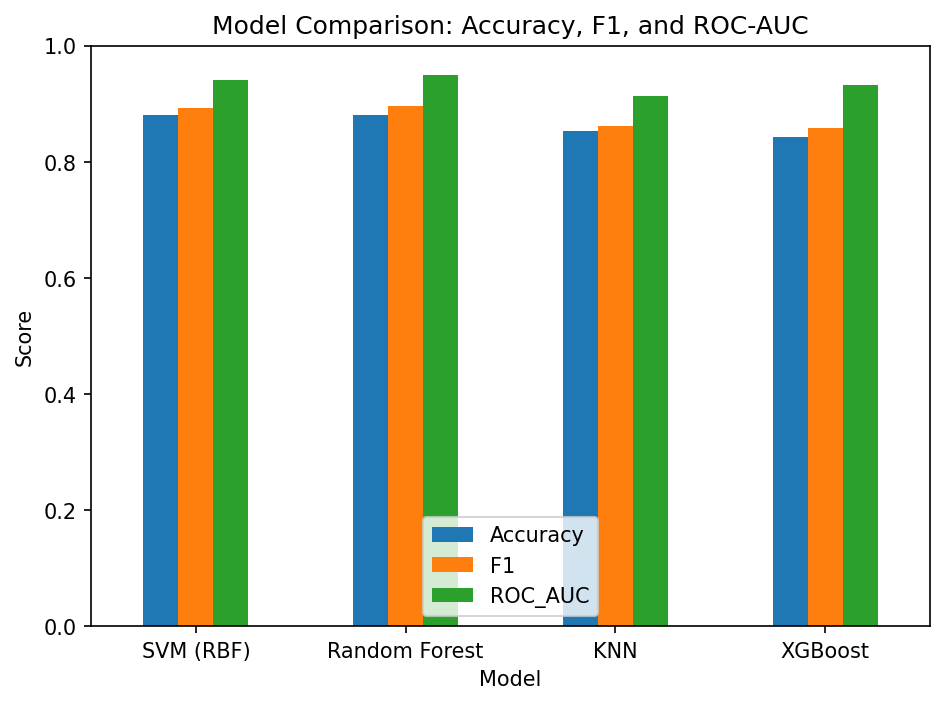

In [161]:
# Visual comparison of model performance
plt.figure(figsize=(10, 5))
results_plot = results_df.set_index('Model')[['Accuracy', 'F1', 'ROC_AUC']]
results_plot.plot(kind='bar')
plt.title('Model Comparison: Accuracy, F1, and ROC-AUC')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



The bar chart highlights how the models trade off overall accuracy and class-balanced performance (F1) 
while ROC-AUC summarizes ranking quality. The best model should show strong and consistent scores across 
these metrics rather than excelling in only one.
